In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape, 'x_train samples')
print(x_test.shape, 'x_test samples')
print(y_train.shape, 'y_trian samples')
print(y_test.shape, 'Y_test samples')

(60000, 28, 28) x_train samples
(10000, 28, 28) x_test samples
(60000,) y_trian samples
(10000,) Y_test samples


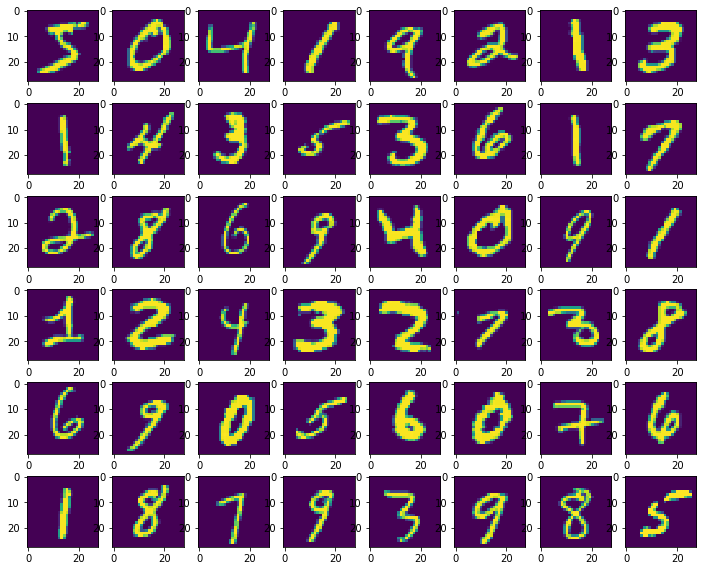

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
x, y = 8, 6

for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],interpolation='nearest')
plt.show()

In [4]:
import keras
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# 将数据变成float类型，这样能够被255除
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one hot 编码，将类向量（整数）转换为二进制类矩阵。
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import Dense, Dropout
# 创建一个网络模型
model = Sequential()
# 创建输入层 512代表的是输出维度为512，也就是第二层神经元有512个，输入维度为(784,)，激活函数为Relu
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# 创建layer2，然后向下层输出的空间维度为512
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 输出层,因为只有10个数字，所以输出空间维度为10，激活函数为softmax。
model.add(Dense(10, activation='softmax'))

# 网络模型的介绍
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=32,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 3s 51us/step - loss: 0.2465 - accuracy: 0.9237 - val_loss: 0.1065 - val_accuracy: 0.9678
Epoch 2/32
60000/60000 [==============================] - 3s 44us/step - loss: 0.1030 - accuracy: 0.9691 - val_loss: 0.0994 - val_accuracy: 0.9723
Epoch 3/32
60000/60000 [==============================] - 3s 43us/step - loss: 0.0761 - accuracy: 0.9765 - val_loss: 0.1093 - val_accuracy: 0.9677
Epoch 4/32
60000/60000 [==============================] - 2s 41us/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.0881 - val_accuracy: 0.9766
Epoch 5/32
60000/60000 [==============================] - 3s 42us/step - loss: 0.0504 - accuracy: 0.9843 - val_loss: 0.0790 - val_accuracy: 0.9803
Epoch 6/32
60000/60000 [==============================] - 3s 44us/step - loss: 0.0440 - accuracy: 0.9874 - val_loss: 0.0849 - val_accuracy: 0.9792
Epoch 7/32
60000/60000 [==============================] - 3s 45us/st

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1598228605695008
Test accuracy: 0.984000027179718


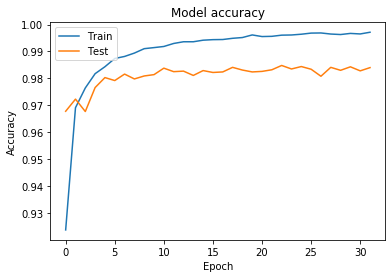

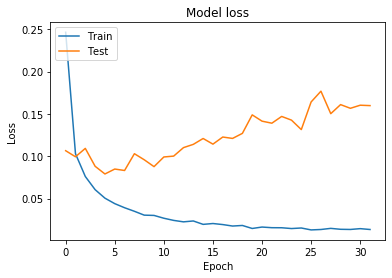

In [10]:

# 绘制训练过程中训练集和测试集合的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练过程中训练集和测试集合的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()